<h1>Analysis of Tasmanian house rent data and prediction of house rents based on known parameters(postcode,no of rooms & length of stay)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel('https://data.gov.au/dataset/f8697442-8f22-432a-bf93-fdc325588b24/resource/bec663d7-205e-48ea-861b-d0495ce74187/download/absreport_jun2018.xlsx')

In [6]:
df.head()

,Suburb,State,Postcode,Bond Amount,Weekly Rent,Bond Lodgement date (DD/MM/YYYY),Bond Activation date (DD/MM/YYYY),No of Bedrooms,Dwelling/Premises Type,Length of Tenancy (In Months)
0,DEVONPORT,TAS,7310,840.0,210.0,2018-06-01,2018-06-01,2.0,SEPARATE HOUSE,6
1,DEVONPORT,TAS,7310,1000.0,250.0,2018-06-01,2018-06-01,1.0,FLAT OR UNIT OR APARTMENT,12
2,WEST MOONAH,TAS,7009,700.0,175.0,2018-06-01,2018-06-04,1.0,SEPARATE HOUSE,11
3,LAUNCESTON,TAS,7250,1272.0,318.0,2018-06-01,2018-06-01,1.0,FLAT OR UNIT OR APARTMENT,3
4,KINGSTON,TAS,7050,1860.0,465.0,2018-06-01,2018-06-06,3.0,UNSPECIFIED,12


In [12]:
df.describe()

,Postcode,Bond Amount,Weekly Rent,No of Bedrooms,Length of Tenancy (In Months)
count,1094.000000,1094.000000,1094.000000,846.000000,1094.000000
mean,7154.061243,1207.657971,317.746271,2.509456,10.601463
std,133.532342,543.010253,130.934113,0.950506,6.393632
min,7000.000000,120.000000,45.000000,1.000000,0.000000
25%,7011.000000,880.000000,240.000000,2.000000,7.000000
50%,7173.000000,1180.000000,300.000000,3.000000,12.000000
75%,7253.000000,1520.000000,385.000000,3.000000,12.000000
max,7470.000000,7600.000000,1900.000000,7.000000,131.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 10 columns):
Suburb                               1094 non-null object
State                                1094 non-null object
Postcode                             1094 non-null int64
Bond Amount                          1094 non-null float64
Weekly Rent                          1094 non-null float64
Bond Lodgement date (DD/MM/YYYY)     1094 non-null datetime64[ns]
Bond Activation date (DD/MM/YYYY)    1094 non-null datetime64[ns]
No of Bedrooms                       846 non-null float64
Dwelling/Premises Type               1094 non-null object
Length of Tenancy (In Months)        1094 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 85.5+ KB


In [33]:
df[df['No of Bedrooms']==np.n]

,Suburb,State,Postcode,Bond Amount,Weekly Rent,Bond Lodgement date (DD/MM/YYYY),Bond Activation date (DD/MM/YYYY),No of Bedrooms,Dwelling/Premises Type,Length of Tenancy (In Months)
967,ROSS,TAS,7209,800.0,200.0,2018-06-25,2018-06-29,6.0,SEPARATE HOUSE,6
1024,INVERMAY,TAS,7248,400.0,100.0,2018-06-26,2018-06-28,6.0,UNSPECIFIED,3
1043,INVERMAY,TAS,7248,360.0,90.0,2018-06-26,2018-06-28,6.0,OTHERS,3
1044,INVERMAY,TAS,7248,400.0,100.0,2018-06-26,2018-06-28,6.0,OTHERS,2
1045,INVERMAY,TAS,7248,400.0,100.0,2018-06-26,2018-07-02,6.0,OTHERS,3
1047,INVERMAY,TAS,7248,300.0,75.0,2018-06-26,2018-06-28,6.0,OTHERS,1
1048,INVERMAY,TAS,7248,400.0,100.0,2018-06-26,2018-06-29,6.0,OTHERS,3


<h2>We drop the rows where no of bedroom data is not available 

In [46]:
df=df.dropna(subset=['No of Bedrooms'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 1093
Data columns (total 10 columns):
Suburb                               846 non-null object
State                                846 non-null object
Postcode                             846 non-null int64
Bond Amount                          846 non-null float64
Weekly Rent                          846 non-null float64
Bond Lodgement date (DD/MM/YYYY)     846 non-null datetime64[ns]
Bond Activation date (DD/MM/YYYY)    846 non-null datetime64[ns]
No of Bedrooms                       846 non-null float64
Dwelling/Premises Type               846 non-null object
Length of Tenancy (In Months)        846 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 72.7+ KB


In [81]:
df.columns

Index(['Suburb', 'State', 'Postcode', 'Bond Amount', 'Weekly Rent',
       'Bond Lodgement date (DD/MM/YYYY)', 'Bond Activation date (DD/MM/YYYY)',
       'No of Bedrooms', 'Dwelling/Premises Type',
       'Length of Tenancy (In Months)'],
      dtype='object')

<h2>Strong correlation between bond and rent is evident in the below plot

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

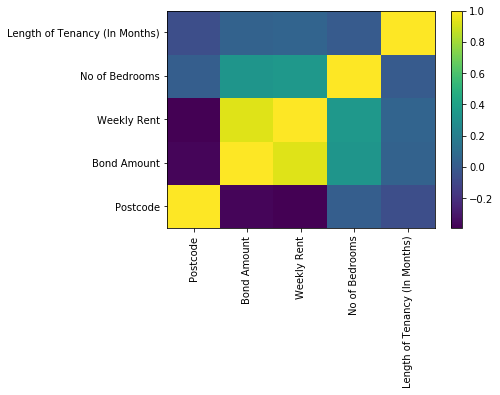

In [95]:
fig,ax = plt.subplots()
im=ax.pcolor(df.corr())
fig.colorbar(im)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5])
ax.set_xticklabels(df.corr().columns)
ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
ax.set_yticklabels(df.corr().columns)
plt.xticks(rotation=90)


    

In [56]:
df.corr()

,Postcode,Bond Amount,Weekly Rent,No of Bedrooms,Length of Tenancy (In Months)
Postcode,1.000000,-0.373783,-0.393038,0.019895,-0.065903
Bond Amount,-0.373783,1.000000,0.933347,0.332350,0.038732
Weekly Rent,-0.393038,0.933347,1.000000,0.348909,0.048356
No of Bedrooms,0.019895,0.332350,0.348909,1.000000,0.001321
Length of Tenancy (In Months),-0.065903,0.038732,0.048356,0.001321,1.000000


<h2>Clear strong correlation between bond and rent shown in the below plot

Text(0, 0.5, 'Rent')

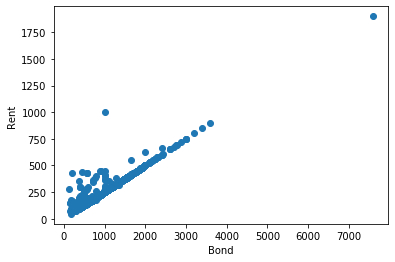

In [101]:
plt.scatter(df[['Bond Amount']],df[['Weekly Rent']])
plt.xlabel('Bond')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

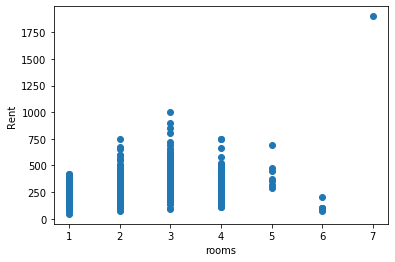

In [102]:
plt.scatter(df[['No of Bedrooms']],df[['Weekly Rent']])
plt.xlabel('rooms')
plt.ylabel('Rent')

<h2>Below boxplots show some correlation between no of bed rooms and rent. However 2&3 bedroom boxplots show many outliers

In [103]:
import seaborn as sns

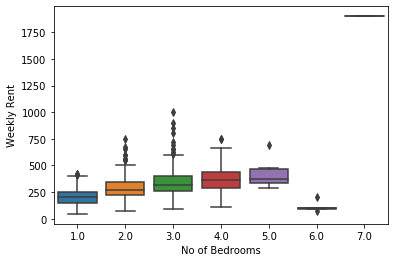

In [107]:
sns.boxplot(x=df['No of Bedrooms'],y=df['Weekly Rent'])


In [120]:
df.groupby('Suburb').mean().sort_values(ascending=False,by='Weekly Rent')

,Postcode,Bond Amount,Weekly Rent,No of Bedrooms,Length of Tenancy (In Months)
Suburb,,,,,
DYNNYRNE,7005.00,3200.000000,800.000000,3.000000,12.000000
BOTHWELL,7030.00,2600.000000,650.000000,3.000000,11.000000
GLEBE,7000.00,2260.000000,595.000000,3.500000,9.000000
NORTH HOBART,7000.00,2126.666667,532.916667,2.583333,9.750000
BATTERY POINT,7004.00,1846.000000,489.000000,1.800000,9.600000
GEILSTON BAY,7015.00,1880.000000,470.000000,3.000000,12.000000
MOUNT STUART,7000.00,1866.666667,466.666667,3.000000,9.666667
SEVEN MILE BEACH,7170.00,1840.000000,460.000000,3.000000,6.000000
MARGATE,7054.00,1840.000000,460.000000,3.000000,12.000000


In [121]:
df_sorted_rent=df.groupby('Suburb').mean().sort_values(ascending=False,by='Weekly Rent')

<h3>Rent distribution is near normal with a major right skew

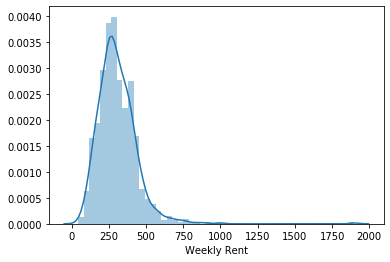

In [123]:
sns.distplot(df['Weekly Rent'])

<h3>We can group by Dwelling and Suburb 

In [159]:
df.groupby(['Dwelling/Premises Type','Suburb']).mean()[['Weekly Rent']]

Weekly Rent
Dwelling/Premises Type    Suburb                       
FLAT OR UNIT OR APARTMENT AUSTINS FERRY      340.000000
                          BATTERY POINT      406.666667
                          BELLERIVE          309.285714
                          BURNIE             306.666667
                          CLAREMONT          223.888889
                          DELORAINE          180.000000
                          DEVONPORT          206.464286
                          EAST DEVONPORT     157.427500
                          EAST LAUNCESTON    403.333333
                          EVANDALE           260.000000
                          GEORGE TOWN        190.000000
                          GLENORCHY          279.375000
                          HAVENVIEW          160.000000
                          HAWLEY BEACH       236.000000
                          HILLCREST          205.000000
                          HOBART             335.714286
                          HOWRAH             305.000000
                          HUONVILLE          187.500000
                          INVERMAY           205.250000
                          KINGS MEADOWS      250.000000
                          KINGSTON           326.428571
                          LADY BARRON        135.000000
                          LATROBE            237.750000
                          LAUNCESTON         338.148333
                          LENAH VALLEY       276.666667
                          LINDISFARNE        352.500000
                          LONGFORD           271.666667
                          LUTANA             217.500000
                          MIDWAY POINT       240.400000
                          MONTELLO           165.000000
...                                                 ...
UNSPECIFIED               INVERMAY           100.000000
                          KINGS MEADOWS      278.333333
                          KINGSTON           430.000000
                          LAUNCESTON         206.500000
                          LEGANA             397.500000
                          LILYDALE           320.000000
                          LINDISFARNE        410.000000
                          MIDWAY POINT       180.000000
                          MOONAH             305.000000
                          NEW NORFOLK        300.000000
                          NEW TOWN           145.000000
                          NEWNHAM            212.500000
                          NEWSTEAD           380.000000
                          NORTH HOBART       530.000000
                          OAKDOWNS           460.000000
                          PRIMROSE SANDS     260.000000
                          PROSPECT VALE      325.000000
                          RISDON VALE        320.000000
                          SANDY BAY          611.666667
                          SASSAFRAS          340.000000
                          SHEARWATER         300.000000
                          SHOREWELL PARK     196.880000
                          SOUTH HOBART       265.000000
                          SOUTH LAUNCESTON   500.000000
                          SQUEAKING POINT    400.000000
                          ULVERSTONE         170.000000
                          UPPER BURNIE       150.000000
                          WARRANE            330.000000
                          WEST HOBART        463.333333
                          WEST MOONAH        167.000000

[301 rows x 1 columns]

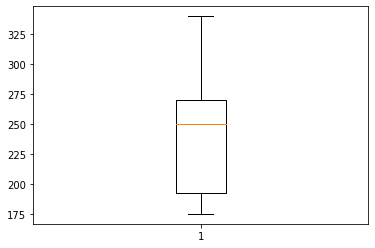

In [164]:
plt.boxplot(df.groupby(['Dwelling/Premises Type','Suburb']).get_group(('FLAT OR UNIT OR APARTMENT','WEST MOONAH'))['Weekly Rent'])
plt.show()

<h3>Mean weekly rent(grouped by Suburb) shows a near normal distribution with a right skew similar to population distribution of rents

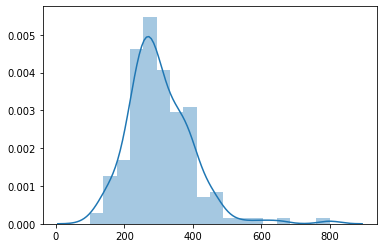

In [176]:
sns.distplot(df_sorted_rent[['Weekly Rent']])
plt.show()

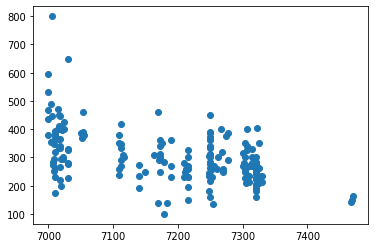

In [177]:
plt.scatter(df_sorted_rent['Postcode'],df_sorted_rent['Weekly Rent'])

<h3>Lets check the correlation between the variables and the house rent 

In [178]:
import scipy

In [180]:
scipy.stats.pearsonr(df_sorted_rent['Postcode'],df_sorted_rent['Weekly Rent'])

(-0.4957212764516167, 9.681394455946104e-13)

In [182]:
scipy.stats.pearsonr(df_sorted_rent['No of Bedrooms'],df_sorted_rent['Weekly Rent'])

(0.2890652041216492, 7.22760232060482e-05)

In [184]:
scipy.stats.pearsonr(df_sorted_rent['Length of Tenancy (In Months)'],df_sorted_rent['Weekly Rent'])

(0.1293961002095943, 0.08084733318715674)

In [187]:
df.corr()

,Postcode,Bond Amount,Weekly Rent,No of Bedrooms,Length of Tenancy (In Months)
Postcode,1.000000,-0.373783,-0.393038,0.019895,-0.065903
Bond Amount,-0.373783,1.000000,0.933347,0.332350,0.038732
Weekly Rent,-0.393038,0.933347,1.000000,0.348909,0.048356
No of Bedrooms,0.019895,0.332350,0.348909,1.000000,0.001321
Length of Tenancy (In Months),-0.065903,0.038732,0.048356,0.001321,1.000000


<h2>3rd degree polynomial can be fitted to scatter plot of postcodes vs rent as follows

In [203]:
p=np.polyfit(deg=3,x=df_sorted_rent['Postcode'],y=df_sorted_rent['Weekly Rent'])
f=np.poly1d(p)
print(f)


            3          2
-8.525e-06 x + 0.1849 x - 1336 x + 3.22e+06


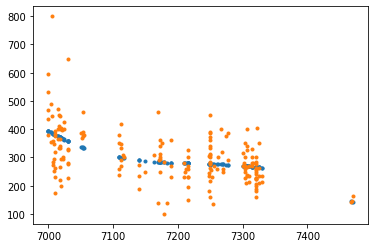

In [204]:
x=df_sorted_rent[['Postcode']]
plt.plot(x,f(x),'.')
plt.plot(df_sorted_rent['Postcode'],df_sorted_rent['Weekly Rent'],'.')

In [206]:
df.groupby('Suburb').get_group('LAUNCESTON')

,Suburb,State,Postcode,Bond Amount,Weekly Rent,Bond Lodgement date (DD/MM/YYYY),Bond Activation date (DD/MM/YYYY),No of Bedrooms,Dwelling/Premises Type,Length of Tenancy (In Months)
3,LAUNCESTON,TAS,7250,1272.0,318.00,2018-06-01,2018-06-01,1.0,FLAT OR UNIT OR APARTMENT,3
45,LAUNCESTON,TAS,7250,820.0,205.00,2018-06-01,2018-06-08,1.0,FLAT OR UNIT OR APARTMENT,6
75,LAUNCESTON,TAS,7250,1200.0,320.00,2018-06-04,2018-06-15,2.0,SEPARATE HOUSE,8
105,LAUNCESTON,TAS,7250,1200.0,305.89,2018-06-04,2018-06-06,1.0,FLAT OR UNIT OR APARTMENT,12
192,LAUNCESTON,TAS,7250,2300.0,575.00,2018-06-05,2018-06-13,3.0,SEPARATE HOUSE,18
239,LAUNCESTON,TAS,7250,1360.0,340.00,2018-06-06,2018-06-15,2.0,UNSPECIFIED,11
259,LAUNCESTON,TAS,7250,146.0,73.00,2018-06-06,2018-06-14,1.0,UNSPECIFIED,0
479,LAUNCESTON,TAS,7250,2600.0,650.00,2018-06-12,2018-06-14,3.0,SEPARATE HOUSE,6
733,LAUNCESTON,TAS,7250,1800.0,450.00,2018-06-18,2018-06-25,2.0,SEPARATE HOUSE,12
741,LAUNCESTON,TAS,7250,2000.0,500.00,2018-06-18,2018-06-22,2.0,FLAT OR UNIT OR APARTMENT,6


<h3>Mean prices of house rent in Launceston area increases with the no of bedrooms. more spread of data can be detected for 2 bedroom houses

In [207]:
df_laun = df.groupby('Suburb').get_group('LAUNCESTON')

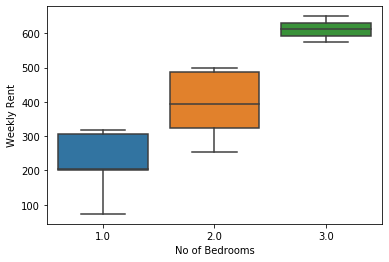

In [211]:
sns.boxplot(x=df_laun['No of Bedrooms'],y=df_laun['Weekly Rent'])

In [212]:
df.columns

Index(['Suburb', 'State', 'Postcode', 'Bond Amount', 'Weekly Rent',
       'Bond Lodgement date (DD/MM/YYYY)', 'Bond Activation date (DD/MM/YYYY)',
       'No of Bedrooms', 'Dwelling/Premises Type',
       'Length of Tenancy (In Months)'],
      dtype='object')

<h2>Let's split the data set as train and test

In [213]:
df_predictions= df[['Postcode','No of Bedrooms','Length of Tenancy (In Months)','Weekly Rent']]

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [216]:
X_train,X_test,y_train,y_test=train_test_split(df_predictions[['Postcode','No of Bedrooms','Length of Tenancy (In Months)']],df_predictions[['Weekly Rent']],test_size=0.3)

In [220]:
from sklearn.pipeline import Pipeline

<h2>The below function will plot the R scores for various degrees of polynomial features and 2 seems to be the best score 

In [223]:
def get_poly_degree_graph(Z_train,Z_test,y_train,y_test):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt
    scores =[]
    order =[1,2,3,4,5,6,7,8,9]
    for n in order:
        pr=PolynomialFeatures(degree=n)
        Z_train_pr=pr.fit_transform(Z_train)
        Z_test_pr=pr.fit_transform(Z_test)
        lm=LinearRegression()
        lm.fit(Z_train_pr,y_train)
        scores.append(lm.score(Z_test_pr,y_test))
    plt.plot(order,scores,'-')
    plt.ylabel('R score')
    plt.show()

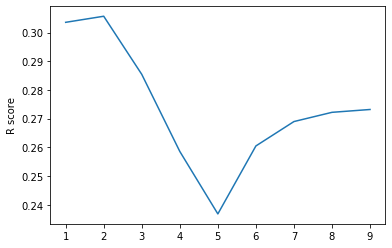

In [224]:
get_poly_degree_graph(X_train,X_test,y_train,y_test)

<h2>Lets use the linear Model to predict the house prices

In [226]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [252]:
pipe1=Pipeline([('scale',StandardScaler()),('poly',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())])

In [264]:
pipe1.fit(X_train,y_train)

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [265]:
pipe1.score(X_test,y_test)

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.3056894090668181

<h2>Linear model prediction distribution is more skinnier than the actual distribution

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


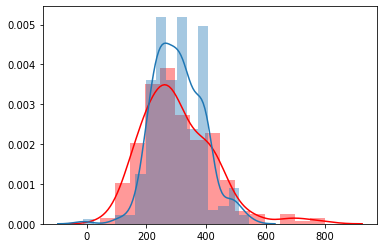

In [234]:
sns.distplot(y_test,color='r')
sns.distplot(pipe1.predict(X_test))

<h2>Let's define our parameters to predict the house rent 

In [246]:
my_data=pd.DataFrame({'Postcode':7250,'No of Bedrooms':2,'Length of Tenancy (In Months)':12},index=[0])

<h2>R score and MSE for pipe1(Linear model)

In [266]:
print('r score:',pipe1.score(X_test,y_test))
print('MSE:',mean_squared_error(y_pred=pipe1.predict(X_test),y_true=y_test))

r score: 0.3056894090668181
MSE: 10155.198376369262


C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<h2>Let's try out RFR model

In [256]:
from sklearn.ensemble import RandomForestRegressor

In [257]:
pipe2=Pipeline([('scale',StandardScaler()),('poly',PolynomialFeatures(include_bias=False,degree=2)),('model',RandomForestRegressor())])

In [258]:
pipe2.fit(X_train,y_train)

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
      ...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

<h2>Mean squred error was improved when we used RFR model

In [260]:
from sklearn.metrics import mean_squared_error

In [262]:
print('r score:',pipe2.score(X_test,y_test))
print('MSE:',mean_squared_error(y_pred=pipe2.predict(X_test),y_true=y_test))

r score: 0.5329013510404784
MSE: 6831.927243314233


C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<h2>Let's predict the house rent for our data

In [267]:
pipe2.predict(my_data)

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([283.56676004])

<h2>We now have a better prediction distribution with RFR model

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


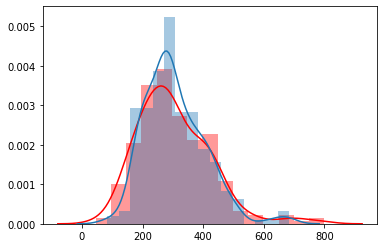

In [268]:
sns.distplot(y_test,color='r')
sns.distplot(pipe2.predict(X_test))

<h2>Difference between the RFR model(pipe2) and Linear model(pipe1) can be viewed by the below scatter plots

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


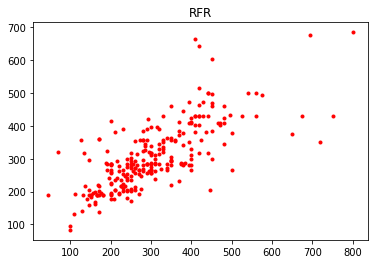

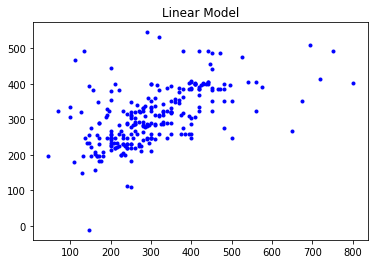

In [283]:
fig,ax1=plt.subplots()
fig,ax2=plt.subplots()
ax1.plot(y_test,pipe2.predict(X_test),'r.')
ax2.plot(y_test,pipe1.predict(X_test),'b.')
ax1.set_title('RFR')
ax2.set_title('Linear Model')
plt.show()

<h2>We can figure out the best fit line for predicted and actual values as follows 

In [295]:
,scipy.stats.linregress(np.array(y_test).reshape(1,-1),pipe2.predict(X_test))

C:\Users\savinda\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\savinda\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:126: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\savinda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\savinda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\savinda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\savinda\Anaconda3\lib\site-packages\scipy\stats\_stats_mst

LinregressResult(slope=0.607233886545228, intercept=121.75580440943003, rvalue=0.7357466667344772, pvalue=nan, stderr=nan)

<h5>This notebook was created by Savinda Lakshan,Eng.